COMP 215 - LAB 4 (Graphs)
-------------------------
#### Name: Sanchit Kwatra

#### Date: 04/02/2026

#### Sources: Textbook and Stackoverflow.com

This lab exercise is an introduction to Graphs and Graph Analysis using [NetworkX](https://networkx.org/documentation/stable/).

**New Python concepts**:
  * **NetworkX** is an open-source package.  It provides a `Graph` object to represent a graph.
  * Built-in `random` module provides algorithms for generating pseudo-random sequences
  * [Generator expression](https://towardsdatascience.com/understanding-generator-expressions-in-python-fe0c4534619) - similar to a list comprehension, but faster and using much less memory!

**Credits**:
    Code examples based on [Think Complexity, 2nd edition](https://thinkcomplex.com).
    Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

As usual, the first code cell simply imports all the modules we'll be using...

In [87]:
%matplotlib inline

import math
import random
from timeit import timeit

import matplotlib.pyplot as plt
import networkx as nx

## ER Graph algorithms.

from the textbook...
> One of the more interesting [random graphs](https://en.wikipedia.org/wiki/Random_graph) is the Erdős-Rényi model, studied by Paul Erdős and Alfréd Rényi in the 1960s.

> An Erdős-Rényi graph (ER graph) is characterized by two parameters: $n$ is the number of nodes and $p$ is the probability that there is an edge between any two nodes.

> Erdős and Rényi studied the properties of these random graphs; one of their surprising results is the existence of abrupt changes in the properties of random graphs as random edges are added.

In this lab we will work towards re-producing this famous computational experiment.

We can start with all the code we developed in class.
Review development of these algorithms in teh `week04-graphs` workbook.

We `seed` Python's built-in random number generator so we get the same sequence each time (to facilitate debugging and comprehension!)  Comment this out and re-run the notebook when you are ready to run experiments.

In [88]:
random.seed(6) # Comment this out to run randomized experiments

In [89]:
def all_pairs(objects):
    """ Return a generator with the complete set of distinct object pairs, as 2-tuples, from the given iterable of objects """
    return ((a, b) for i in range(1, len(objects)) for a,b in zip(objects, objects[i:]))

# unit tests
assert set( all_pairs(('w', 'x', 'y', 'z')) ) == {('w', 'x'), ('x', 'y'), ('y', 'z'), ('w', 'y'), ('x', 'z'), ('w', 'z')}

In [90]:
def coin_toss(p=0.5):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    return random.random() < p

In [91]:
def random_pairs(objects, p=0.5):
    """ Return a generator of random subset of distinct object pairs (2-tuples), each with a probability of `p` """
    return (pair for pair in all_pairs(objects) if coin_toss(p))  # "flip a coin" to determine whether a given pair is included.

# Notice: no way to automate tests for random functions because they produce "side-effects" !!!
list( random_pairs(('w', 'x', 'y', 'z'), p=0.5) )

[('y', 'z'), ('w', 'y'), ('x', 'z')]

In [92]:
def make_random_graph(n, p):
    """ Return an ER Graph with n nodes, where the probability of an edge between a pair of nodes in p """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(random_pairs(labels, p))
    return graph

### Experiment:  Randomly connected graphs
The following experiment creates a graph with $N$ nodes where the probability of any 2 nodes being connected is $p$

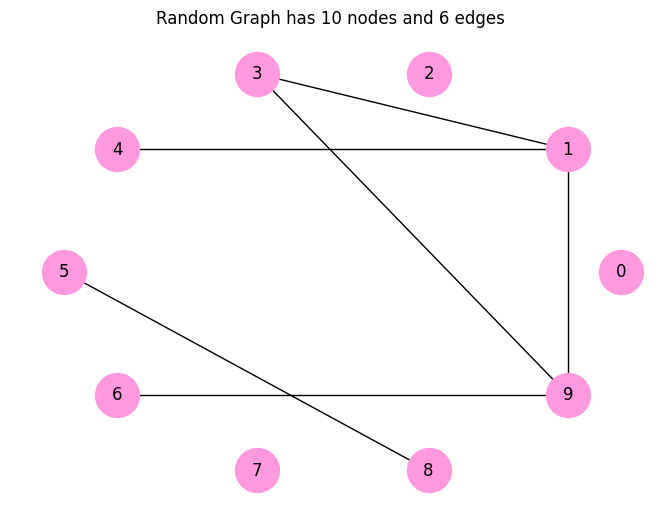

In [93]:
N = 10
p = 0.2

random_graph = make_random_graph(N, p)

nx.draw_circular(random_graph,
                 node_color='#ff99dd',
                 node_size=1000,
                 with_labels=True)
plt.gca().set(
    title=f'Random Graph has {random_graph.number_of_nodes()} nodes and {random_graph.number_of_edges()} edges'
)
plt.show()

In [94]:
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(graph.neighbors(node))
    return seen

In [95]:
def is_connected(graph):
    """ Return True if the graph is connected, false otherwise. """
    start = next(iter(graph))   # grab the first node in the graph.  This statement will need some further explanation.
    reachable = reachable_nodes(graph, start)
    return len(reachable) == len(graph)

In [96]:
is_connected(random_graph)

False

## Lab Exercises

### Exercise 1
Use `timeit` to run an experiment that times the `reachable_nodes` algorithm.
Once you understand how `timeit` works, design a small experiment to time the `reachable_nodes` algorithm for a range of graph sizes (`n`)
Plot the results of your experiment, where x = graph size (`n`) and y = avg. execution time in seconds

In [97]:
# here's an example of how to use timeit:
N = 100
p = 1
g = make_random_graph(N, p)  # when p=1, this is a complete graph!
timing_trials = 5
seconds = timeit(lambda: reachable_nodes( g,  0),  number=timing_trials)
f'Avg. time to execute: {seconds/timing_trials} seconds'

'Avg. time to execute: 0.0007459598000423284 seconds'

Running experiment for n values: [10, 50, 100, 200, 300, 500, 800, 1000]
n=10: 0.000001 sec
n=50: 0.000026 sec
n=100: 0.000069 sec
n=200: 0.000199 sec
n=300: 0.000456 sec
n=500: 0.001193 sec
n=800: 0.003513 sec
n=1000: 0.006335 sec


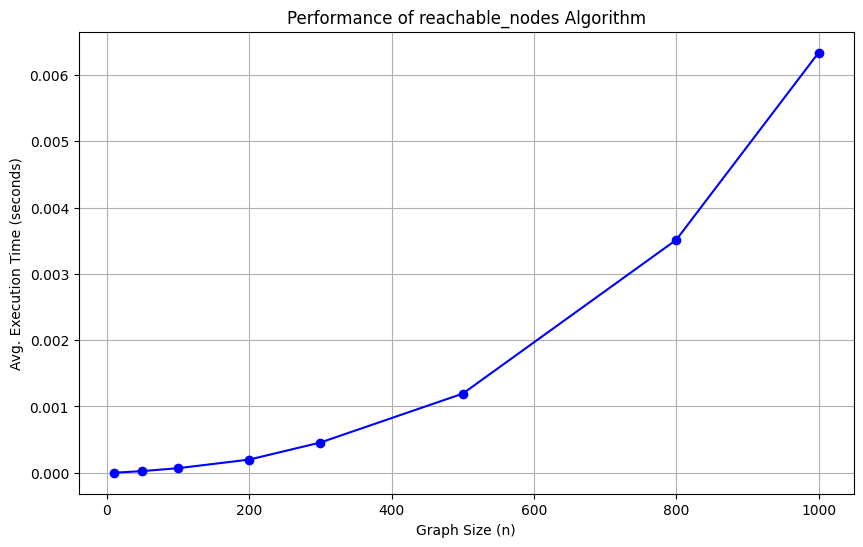

In [98]:
def run_experiment():
    # Parameters
    ns = [10, 50, 100, 200, 300, 500, 800, 1000]  # Range of graph sizes (n)
    p = 0.05                                      # Fixed probability
    times = []                                    # Store execution times

    print(f"Running experiment for n values: {ns}")

    for n in ns:
        # Create the graph and pick a starting node
        G = make_random_graph(n, p)
        start_node = 0  # Nodes in Gnp are integers 0 to n-1

        # Define a wrapper function for timeit to call
        # We pass G and start_node into the closure
        test_func = lambda: reachable_nodes(G, start_node)

        # Measure execution time
        # number=10 runs it 10 times and takes the total; we divide to get avg
        result_time = timeit(test_func, number=50) / 50
        times.append(result_time)
        print(f"n={n}: {result_time:.6f} sec")

    return ns, times

# Run the experiment
x_values, y_values = run_experiment()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.title('Performance of reachable_nodes Algorithm')
plt.xlabel('Graph Size (n)')
plt.ylabel('Avg. Execution Time (seconds)')
plt.grid(True)
plt.show()

### Exercise 2:
What is the **Big-O time complexity** of the `reachable_nodes` algorithm?

#### Ex. 2 Your Answer:


Complexity: $O(V + E)$


Definition: $V$ is the number of nodes (vertices) and $E$ is the number of edges.

Reasoning: The algorithm performs a linear traversal (DFS/BFS), visiting every connected node and checking every connected edge exactly once.

## Likelihood of connectivity

We are ready to replicate Erdős and Rényi's computational experiment.
In this experiment, we estimate the likelihood that a randomly-generated ER graph is connected.

Like most computational experiments, we simple "brute force" the solution - create a big pile of ER graphs, and simply count up how many of them are connected.

### Exercise 3:
Write a function that runs one ER experiment for a given value of $n$ and $p$.

The function generates `n_trials` (number of trials) graphs and returns the proportion of them that are connected.

In [99]:

def proportion_connected(n, p, n_trials=100):
    """ Return the proportion of random ER Graphs (n, p) that are connected out of n_trials. """
    count_connected = 0

    # Step 1: make n_trials random graphs
    for _ in range(n_trials):
        G = nx.fast_gnp_random_graph(n, p)

        # Step 2: Check if connected and increment count
        if nx.is_connected(G):
            count_connected += 1

    # Step 3: compute the proportion
    return count_connected / n_trials

# Test the function
n = 30
p = 0.1
p_connected = proportion_connected(n, p) * 100
print(f'Likelihood that an ER graph (n={n}, p={p}) is connected: {p_connected:.1f}%')

Likelihood that an ER graph (n=30, p=0.1) is connected: 24.0%


### Exercise 4:
Our experimental results will be more accurate (i.e., show less variation between runs) when we use large for `n_trials`.  But we've seen that large values for `n` can cause serious performance issues.
Experiment a little to find a reasonable value of `n_trials` to experiment with.  Ideally you would produce a timing graph like the one in Ex. 1, but that's optional

In [100]:
# Ex. 4 timing experiments
def run_trials_experiment():
    # Parameters
    n_fixed = 50       # Keep graph size constant
    p_fixed = 0.1      # Keep probability constant
    trials_list = [10, 50, 100, 200, 500, 1000] # Varying number of trials
    execution_times = []

    print(f"Timing experiment for n={n_fixed}...")

    for trials in trials_list:
        # Wrap function for timeit
        test_func = lambda: proportion_connected(n_fixed, p_fixed, trials)

        # Run 5 times and take average to smooth out noise
        avg_time = timeit.timeit(test_func, number=5) / 5
        execution_times.append(avg_time)
        print(f"n_trials={trials}: {avg_time:.4f} sec")

    return trials_list, execution_times

# What is a reasonable value for `n_trials` to use in the experimental setup below where we will run trials for 20 different values of $p$?


#### Your Answer: n_trials = 100
This is because we have to loop through 20 different values for p, doing 100 trails means generating 2,000 graphs total. 100 trials gives you a clean percentage (1% granularity). If you drop it to something like 10, your data will be too noisy and the plot will lokk supper tight.


## Critical Value of $p$

Near a "critical value" of $p$, the likelihood of a random graph being connected rapidly changes from near 0 to near 1.
Erdős and Rényi predict the critical value should be:  $ln(n) / n$
For example...

In [101]:
n = 30
f'Erdős and Rényi predict the critical value of p for graphs of size {n} = {math.log(n) / n:0.3f}'

'Erdős and Rényi predict the critical value of p for graphs of size 30 = 0.113'

### Exercise 5:
Develop an experimental setup that estimates the `proportion_connected` for different values for $p$.
You will need to define a suitable range of values for $p$, and choose a value for $n_trials$ (determined above).
The goal of this experiment is to plot $p$ against `proportion_connected(p)` to identify the "critical value" of $p$ for graphs of size $n$.  This will be the point where the random graphs change from being primarily disconnected to being primarily connected.

Running experiment for n=50...


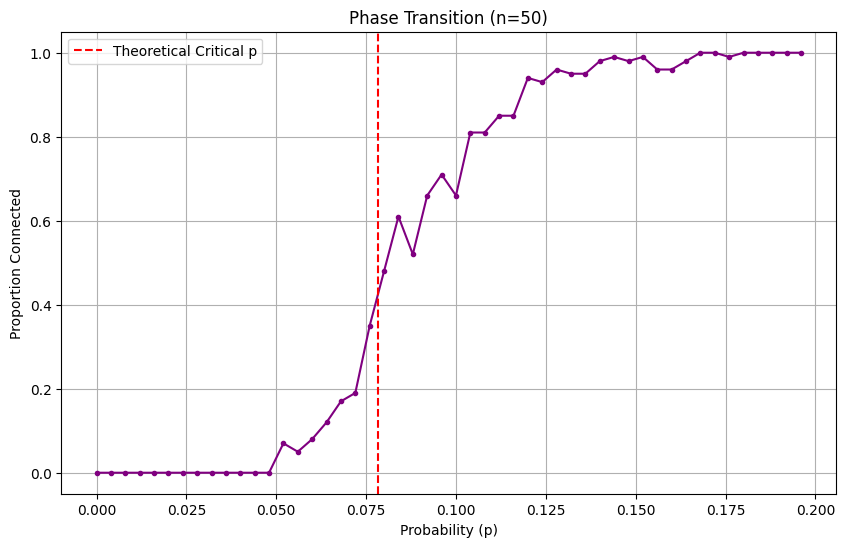

In [102]:
n = 50
n_trials = 100
steps = 50

# 2. Create a list of p values manually (0.0 to 0.2)
# We do this without numpy by using a simple loop
p_values = []
for i in range(steps):
    # This creates 50 steps between 0 and 0.2
    p = i * (0.2 / steps)
    p_values.append(p)

# 3. Run the experiment
proportions = []
print(f"Running experiment for n={n}...")

for p in p_values:
    # Use your function from Exercise 3
    prop = proportion_connected(n, p, n_trials)
    proportions.append(prop)

# 4. Plot Results
plt.figure(figsize=(10, 6))
plt.plot(p_values, proportions, marker='.', color='purple')

# Calculate theoretical critical value using standard math library
critical_p = math.log(n) / n
plt.axvline(x=critical_p, color='r', linestyle='--', label='Theoretical Critical p')

plt.title(f'Phase Transition (n={n})')
plt.xlabel('Probability (p)')
plt.ylabel('Proportion Connected')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 6:
Does your experiment confirm or refute Erdős and Rényi's results?

What real-world applications / implications might this understanding of graph connectivity have?

#### Ex. 6 Your Answer:


Our experiment confirms Erdős and Rényi's results by revealing a sharp "S-curve," proving that connectivity emerges abruptly at a critical threshold rather than gradually. This "tipping point" behavior is vital in real-world systems like epidemiology, explaining how a localized outbreak suddenly snaps into a global pandemic once transmission rates cross a specific limit. Understanding this threshold allows us to better design resilient infrastructure and effective vaccination strategies to prevent such cascading failures.